# Similarity

Similarity between two songs have been defined by Tchernichovski et al (2000). This is a reimplementation of this algorithm.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import birdsonganalysis as bsa
from scipy.io import wavfile


Let's first reload two unrelated songs.

In [2]:
sr, sig = wavfile.read('../songs/simple.wav')
sr2, sig2 = wavfile.read('../songs/flashcam.wav')

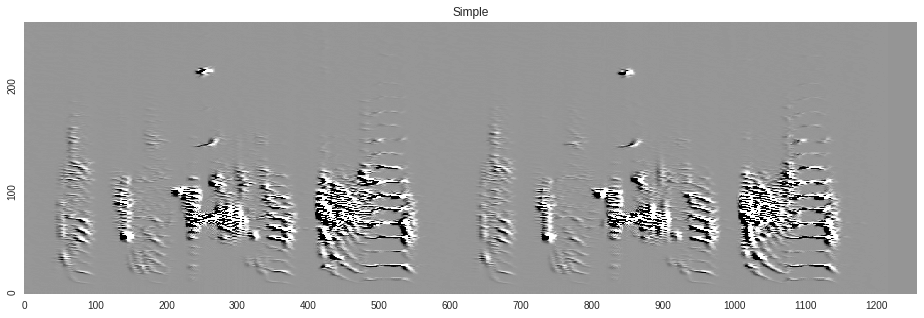

In [3]:
spec_derivs_simple = bsa.spectral_derivs(sig)
fig = plt.figure(figsize=(16, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(spec_derivs_simple, 0.05, ax)
ax.set_title('Simple')
plt.show(fig)

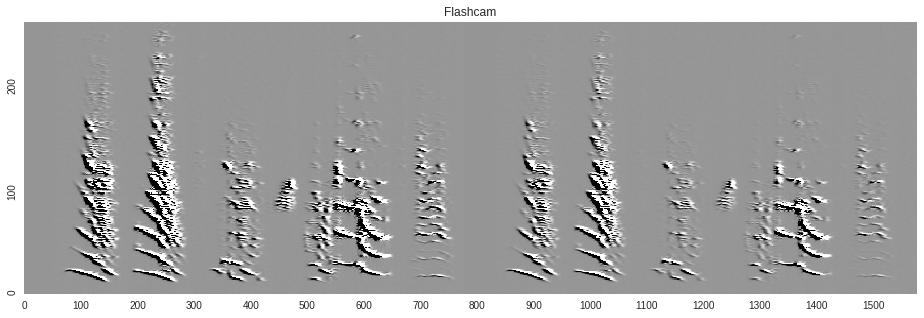

In [4]:
spec_derivs_flash = bsa.spectral_derivs(sig2)
fig = plt.figure(figsize=(16, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(spec_derivs_flash, 0.01, ax)
ax.set_title('Flashcam')
plt.show(fig)

## Compare their similarity

Let's see if simple could be similar to the reference song flashcam

In [5]:
sim1= bsa.similarity(sig, sig2, threshold=0.05)
print(sim1['similarity'])

0.349030574198


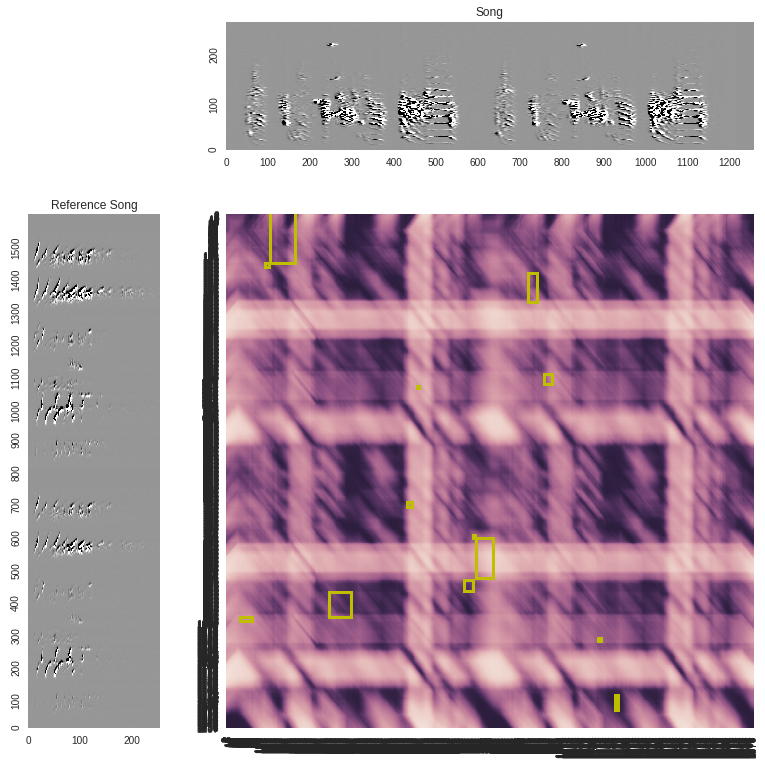

In [6]:
fig = bsa.similarity_plot(sim1, sig, sig2)
plt.show(fig)

As we can see, simple is similar to samba only by 36%.

Is simple similar to itself?


In [7]:
sim = bsa.similarity(sig, sig, threshold=0.05)
print(sim['similarity'])

1.0


Simple is similar to itself at 99%.

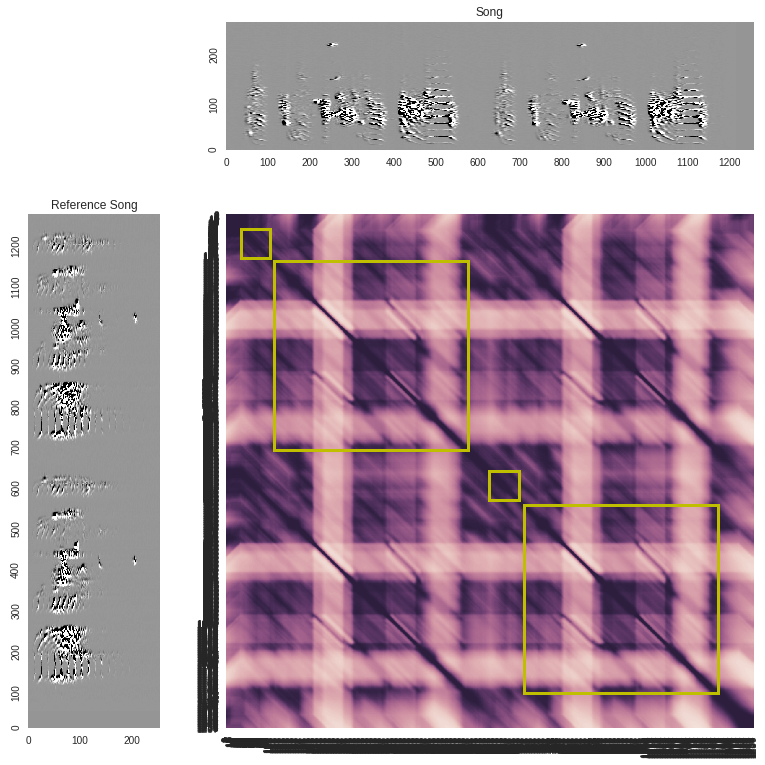

In [8]:
fig = bsa.similarity_plot(sim, sig, sig)
plt.show(fig)

# Comparison between bells and a reproduction from a real bird!

In [2]:
sr, bells = wavfile.read('../songs/flashcam.wav')
sr, bells_rep = wavfile.read('../songs/flashcam_reproduction.wav')

In [3]:
spec_derivs_rep = bsa.spectral_derivs(bells_rep)
spec_derivs_bells = bsa.spectral_derivs(bells)

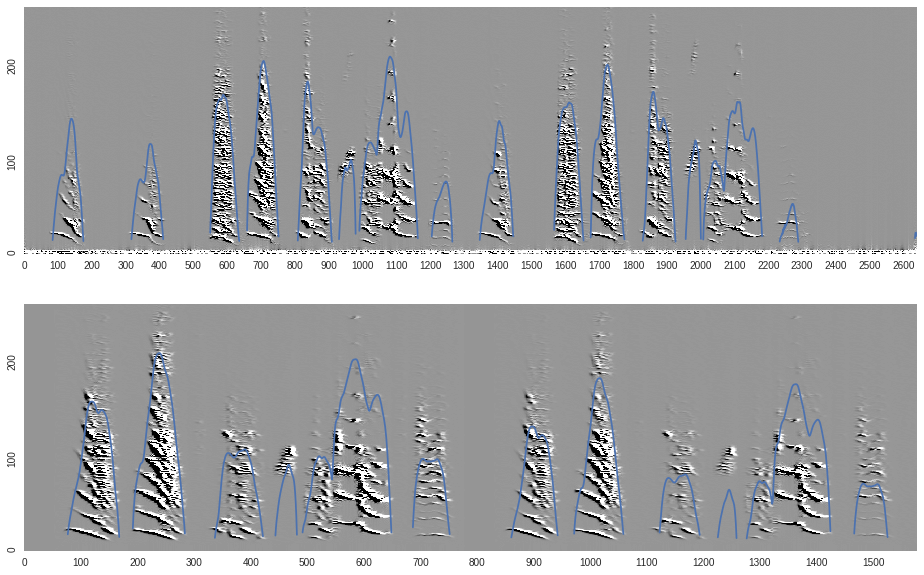

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))
bsa.spectral_derivs_plot(spec_derivs_rep, 0.01, ax=ax1)
amp = bsa.song_amplitude(bells_rep)
amp[amp < 60] = np.nan
ax1 = bsa.plot_over_spec(amp, ax=ax1)
bsa.spectral_derivs_plot(spec_derivs_bells, 0.01, ax=ax2)
amp = bsa.song_amplitude(bells)
amp[amp < 60] = np.nan
ax2 = bsa.plot_over_spec(amp, ax=ax2)
plt.show(fig)

In [5]:
simrep = bsa.similarity(bells_rep, bells, threshold=0.05, silence_song_th=60, silence_ref_th=60)
print(simrep['similarity'])

0.538735294118


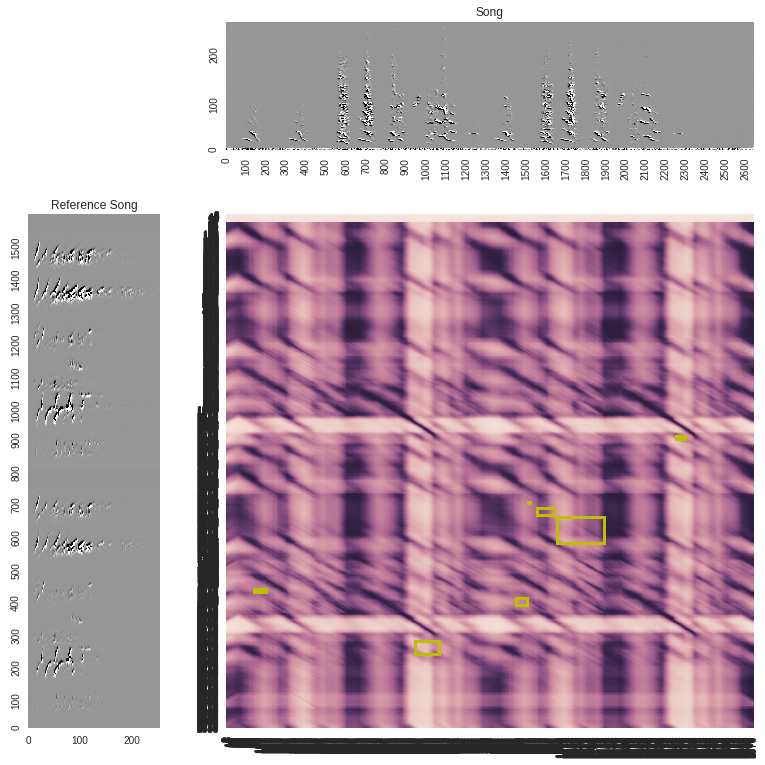

In [6]:
fig = bsa.similarity_plot(simrep, bells_rep, bells)
plt.show(fig)